# The Machine Learning Landscape

In [1]:
# Imports required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Analyzing the Data

In [4]:
# Loads and displays the data
lifesat = pd.read_csv("./../Data/lifesat.csv")

display(lifesat)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


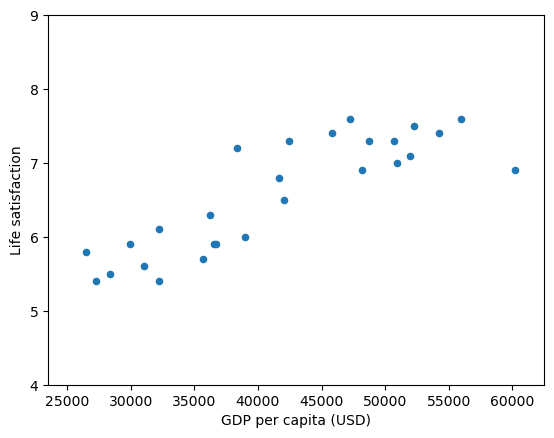

In [5]:
# Prepares and visualizes the data

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

lifesat.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])
plt.show()

## Building Model-based Prediction

In [6]:
# Selects a linear modela and trains it

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [7]:
# Shows parameters for trained linear model

print("Intercept:", lin_reg.intercept_, ", Slope:", lin_reg.coef_)

Intercept: [3.74904943] , Slope: [[6.77889969e-05]]


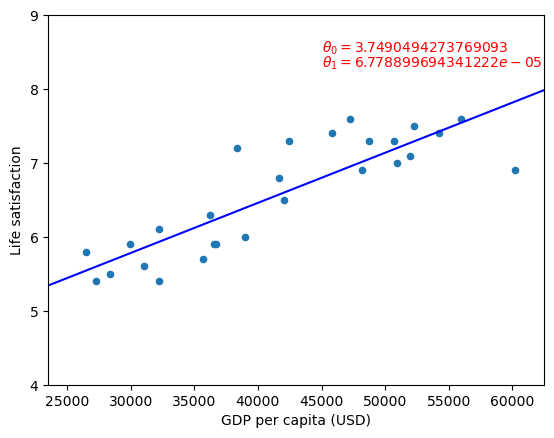

In [8]:
# Visualizes the fitted linear model

# First, gets two points of the line to draw
line_x = np.linspace(20000, 65000, 2)
line_y = lin_reg.coef_*line_x + lin_reg.intercept_
line_y = line_y.reshape(-1)

# And then plot the line over all the data points
lifesat.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])
plt.plot(line_x, line_y, "b")
plt.text(45000, 8.5, fr"$\theta_0 = {lin_reg.intercept_[0]} $", color="r")
plt.text(45000, 8.3, fr"$\theta_1 = {lin_reg.coef_[0][0]} $", color="r")

plt.show()

In [9]:
# Now, makes a life satisfaction prediction for Cyprus using linear model

X_test = [[37_655.2]]  # Cyprus' GDP per capita in 2020
y_predictions = lin_reg.predict(X_test)
print(y_predictions)

[[6.30165767]]


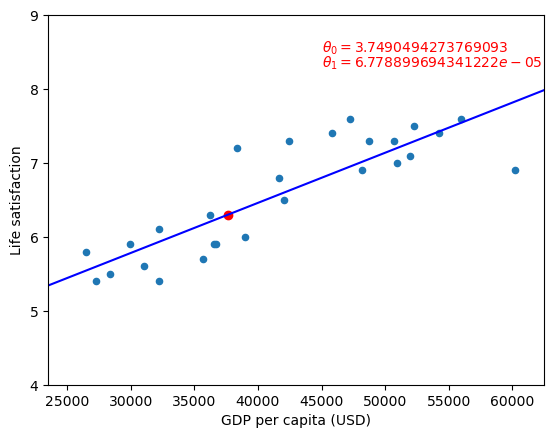

In [10]:
# Plots the prediction to check if it falls on the trained straight line

lifesat.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])
plt.plot(line_x, line_y, "b")
plt.text(45000, 8.5, fr"$\theta_0 = {lin_reg.intercept_[0]} $", color="r")
plt.text(45000, 8.3, fr"$\theta_1 = {lin_reg.coef_[0][0]} $", color="r")
plt.scatter(
    X_test,
    y_predictions,
    c=np.array(["red"])
)
plt.show()

Had instance-based learning algorithm was used instead, we would have found that Slovenia has the closest GDP per capita to that of Cyprus ($20,732), and since Slovenians’ life satisfaction is 5.7, we would have predicted a life
satisfaction of 5.7 for Cyprus. If we zoom out a bit and we look at the two next-closest countries, we will find Portugal and Spain with life satisfactions of 5.1 and 6.5, respectively. Averaging these three values, we get 5.77, which is pretty close to your model-based prediction. This simple algorithm is called k-Nearest Neighbors regression (in this example, k = 3).

In [11]:
# Selects an instance-based learning model and trains it

knn_reg = KNeighborsRegressor(n_neighbors = 3)

knn_reg.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# Now, makes a life satisfaction prediction for Cyprus using instance-based model

y_predictions = knn_reg.predict(X_test)
print(y_predictions)

[[6.33333333]]
